In [9]:
import sys
from pathlib import Path, PureWindowsPath
current_folder = PureWindowsPath(globals()['_dh'][0]).as_posix()
path_root = "/".join(current_folder.split("/")[:-3]) #remonter au dossier root du projet
os.chdir(path_root)
print(os.getcwd())
sys.path.append(os.getcwd() + "/sources/classification/")

c:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_bapteme_philo


In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from pathlib import Path, PureWindowsPath
from lib_classification import *
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

In [11]:
path = PureWindowsPath(os.getcwd() + "/data/input/data_middle_age_epistemology.parquet")
path = path.as_posix() #convertir en path linux (convertir les \\ en /)
corpus = pd.read_parquet(path) #engine="fastparquet"
corpus = get_balanced_binary_dataset(corpus, class_col_name="category")

# print(corpus["category_bin"].value_counts())
# print("presence de doublons ?")
# print(corpus.id.duplicated().any())
# print(corpus.index.duplicated().any())
# corpus

In [12]:
corpus

,id,message,message_preprocessed,category,length,category_bin
0,0,"> Or, il n’est pas possible non plus qu’on remonte à l’infini dans les causes > efficientes ; car, parmi toutes les causes efficientes ordonnées entre > elles, la première est cause des intermédiaires et les intermédiaires sont > causes du dernier terme, que ces intermédiaires soient nombreux ou qu’il n’y > en ait qu’un seul.",or possible non plus remonte infini cause efficientes car parmi toutes cause efficientes ordonnée entre elles première cause intermédiaire intermédiaire cause dernier terme intermédiaire nombreux seul,epistemology,327,0
1,1,"> Il est écrit (Rm 5, 18) » Comme la faute d’un seul a entraîné la > condamnation de tous les hommes, ainsi la justice d’un seul procure à tous > les hommes la justification qui donne la vie. » Or le démérite d’Adam a > entraîné la condamnation des autres hommes. A plus forte raison le mérite du > Christ rejaillit sur les autres.",écrit rm » comme faute seul a entraîné condamnation tous homme ainsi justice seul procure tous homme justification donne vie » or démérite adam a entraîné condamnation autres homme a plus forte raison mérite christ rejaillit autres,epistemology,331,0
...,...,...,...,...,...,...
712,712,"Dans les deux derniers cas, cela ne peut être donné qu’aux créatures rationnelles, c’est-à-dire les hommes et les anges.",deux dernier cas cela peut être donné créature rationnelles est-à-dire homme ange,epistemology,120,0
713,713,"Cornelius Van Til était, selon toute vraisemblance, un homme d’Eglise et un chrétien pieux, et nous pouvons tous en être reconnaissants et, à cet égard, chercher à le suivre. Pour autant que nous le sachions, il était et reste un frère en Christ avec lequel tous les vrais croyants passeront l’éternité à adorer notre Seigneur, et son appel pour une foi sans compromis en Christ est quelque chose que nous devrions tous annoncer. La grande majorité de ceux qui se considèrent comme des disciples de Van Til sont aussi des chrétiens pieux et humbles, frères et sœurs en Christ. Cela dit, quelle devrait être notre réponse à Van Til si les quelques critiques que j’ai formulées sont exactes ?",cornelius van til selon toute vraisemblance homme eglise chrétien pieu pouvons tous être reconnaissants cet égard chercher suivre autant sachions reste frère christ lequel tous vrai croyant passeront éternité adorer seigneur appel foi sans compromis christ quelque chose devrions tous annoncer grand majorité ceux considèrent comme disciple van til aussi chrétien pieu humbles frère sœurs christ cela dit quelle devrait être réponse van til si quelques critique formulées exactes,middle_age,690,1


In [13]:
features_col_names = "message_preprocessed" 
# class_col_name = "category"
class_col_name = "category_bin" 
id_col_name = "id"
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_and_test(corpus, features_col_names, class_col_name, id_col_name)
X_train_tfidf, X_test_tfidf = apply_tfidf_to_train_and_test(X_train, X_test)

In [14]:
# scoring = ['accuracy', 'f1_macro']
# num_iter = 2 #nombre de repetitions de la k-fold cross validation entiere
# k = 10 #k de la k-fold cross validation
# do_cross_validation(X_train_tfidf, y_train, scoring, num_iter, k)

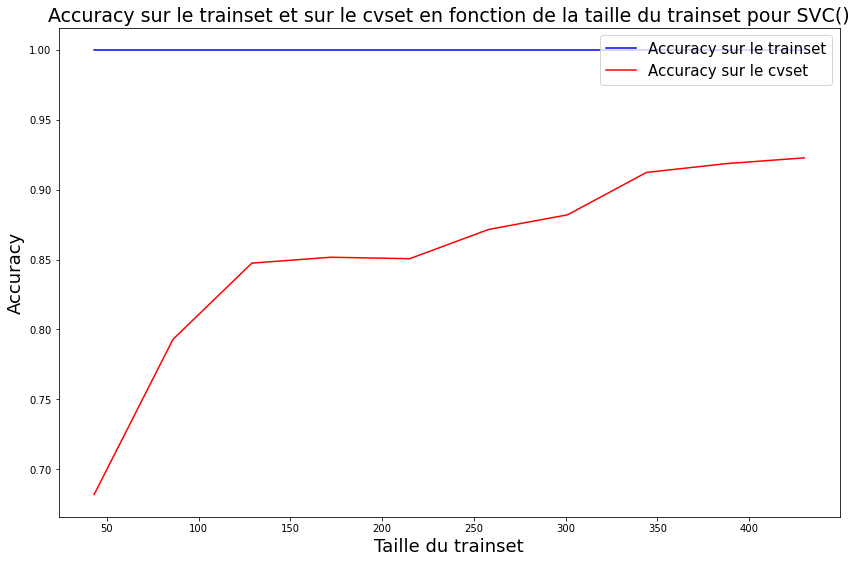

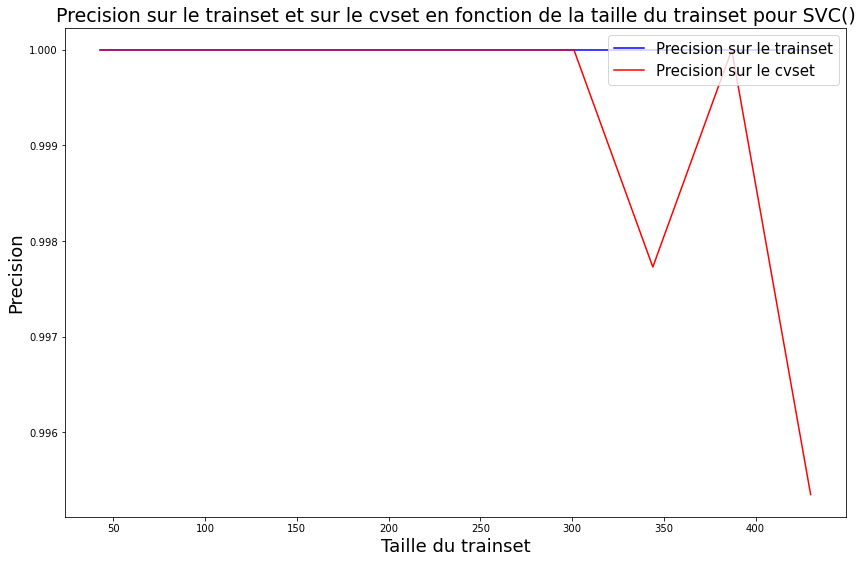

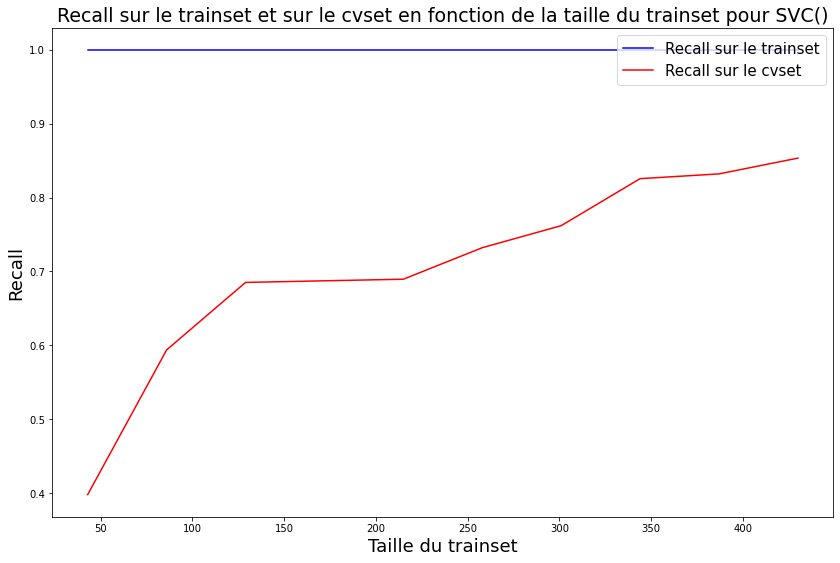

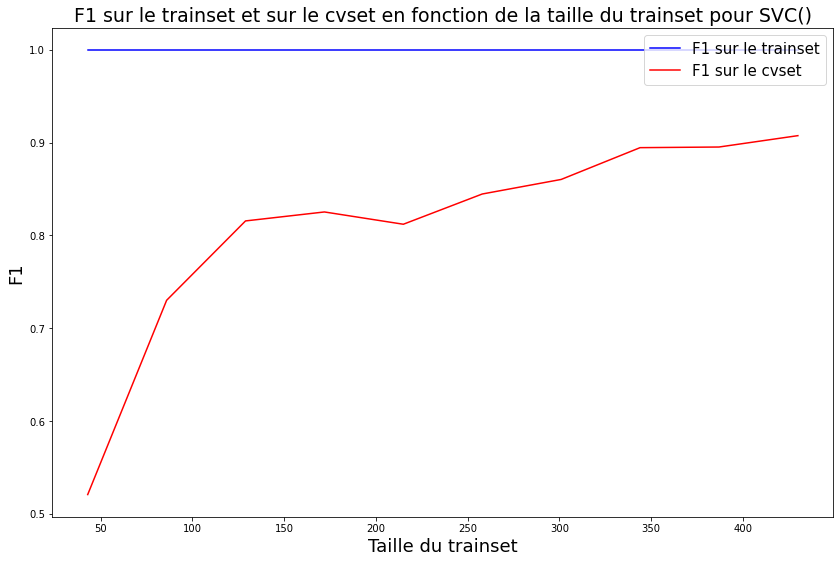

In [15]:
k = 10
# kfold = StratifiedKFold(n_splits=k, random_state=None, shuffle=True) #n_splits = k de la k-fold cv, le nombre de fold
kfold = RepeatedStratifiedKFold(n_splits=k, n_repeats=2, random_state=None)
cv_param = kfold
num_experiences = 10
train_sizes = np.linspace(0.1, 1.0, num_experiences)
# train_sizes = np.linspace(0.001, 1.0, num_experiences)
n_jobs = -1
model = SVC()

scorings = ['accuracy', 'precision', 'recall', 'f1']
for scoring in scorings:
        get_learning_curve(model, X_train_tfidf, y_train, cv_param, scoring, train_sizes, n_jobs=-1, savefig=True)

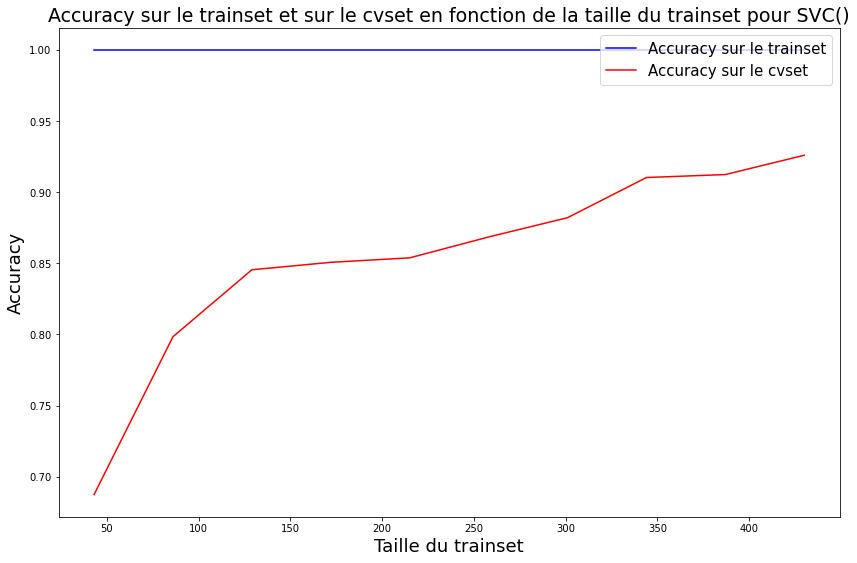

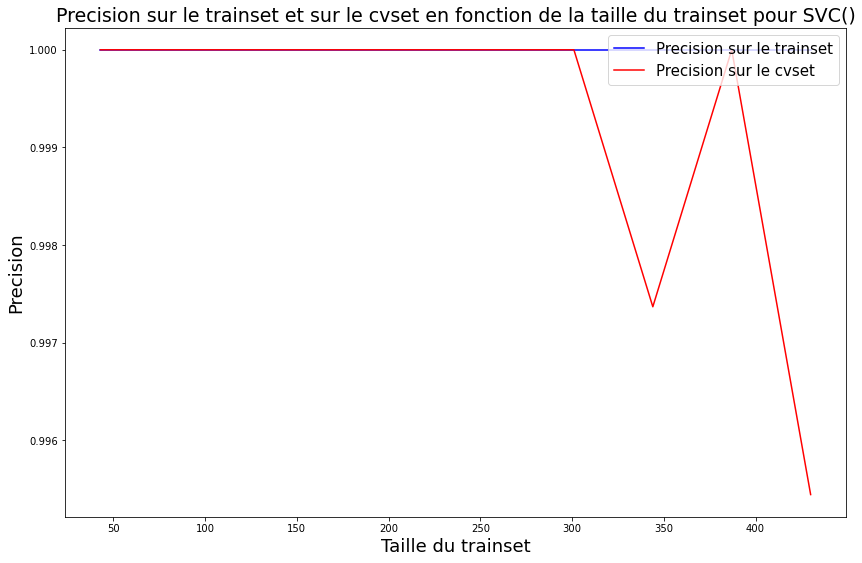

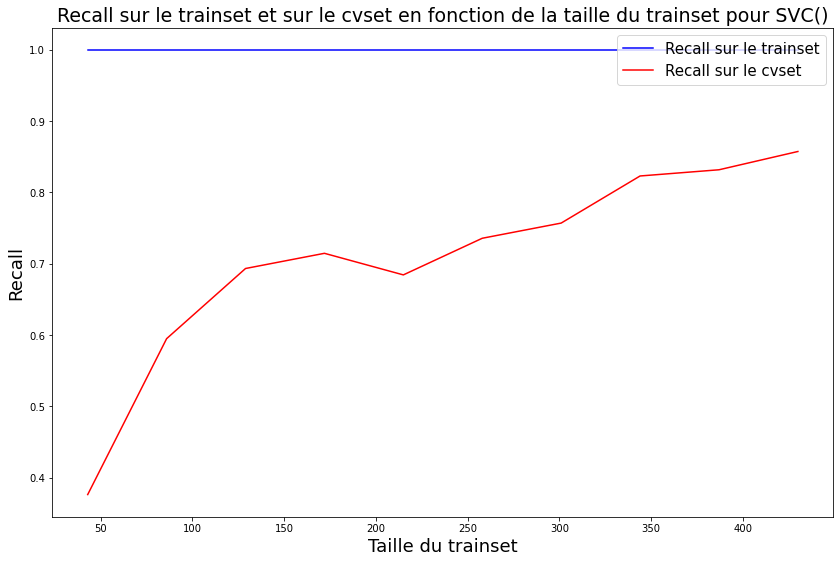

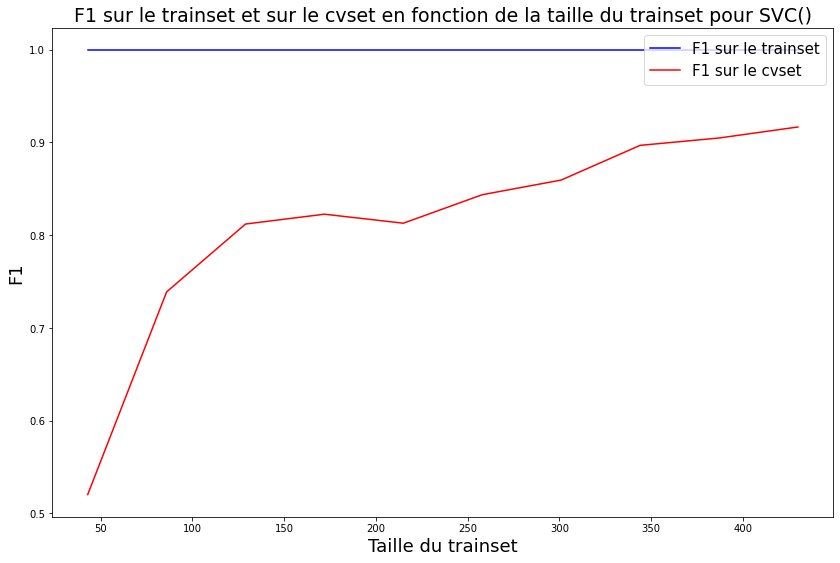

In [16]:
for scoring in scorings:
        get_learning_curve(model, X_train_tfidf, y_train, cv_param, scoring, train_sizes, n_jobs=-1)